In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import acquire
import prepare
from env import get_db_url
import time
import warnings
warnings.filterwarnings("ignore")
import explore

### Questions to keep in mind (5 should be answered very thoroughly. Could touch on all, but 5 min- for MVP)

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

In [2]:
df = prepare.prepare_logs()

In [3]:
df.head()

,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,updated_at,program_id,date_time
0,/,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,hampton,2015-09-22 00:00:00,2016-02-06 00:00:00,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,teddy,2018-01-08 00:00:00,2018-05-17 00:00:00,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24


#### initial thoughts
- I want to look into this a little further to make sure we wouldn't be losing something important, but could consider dropping, especially for MVP
- deleted_at column should be dropped
- data, time, start_date, end_date, created_at, updated_at - by the names of these columns, thinking can convert to datetime
- path probably makes sense to stay object, but can we potentially look at groups/feature eng columns here? possibility to keep in mind
- user_id as int - this is fine for now, but want to make sure this is not treated as continuous I'm thinking
- cohort id- could potentially change the float out with the actual cohort name
- ip - probably good, also potential for feature eng... like if we want to look at different area of users. here is a good site to help https://www.whatismyip.com/ip-address-lookup/
- program_id - fine, but also can change to program name if we'd like

#### Histogram

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   path        900222 non-null  object 
 1   user_id     900223 non-null  int64  
 2   cohort_id   847330 non-null  float64
 3   ip          900223 non-null  object 
 4   name        847330 non-null  object 
 5   start_date  847330 non-null  object 
 6   end_date    847330 non-null  object 
 7   created_at  847330 non-null  object 
 8   updated_at  847330 non-null  object 
 9   program_id  847330 non-null  object 
 10  date_time   900223 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 75.5+ MB


In [5]:
df[['date_time', 'start_date', 'end_date', 'created_at', 'updated_at']] = df[['date_time','start_date', 'end_date', 'created_at', 'updated_at']].apply(pd.to_datetime)

array([[<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'cohort_id'}>,
        <AxesSubplot:title={'center':'start_date'}>],
       [<AxesSubplot:title={'center':'end_date'}>,
        <AxesSubplot:title={'center':'created_at'}>,
        <AxesSubplot:title={'center':'updated_at'}>],
       [<AxesSubplot:title={'center':'date_time'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

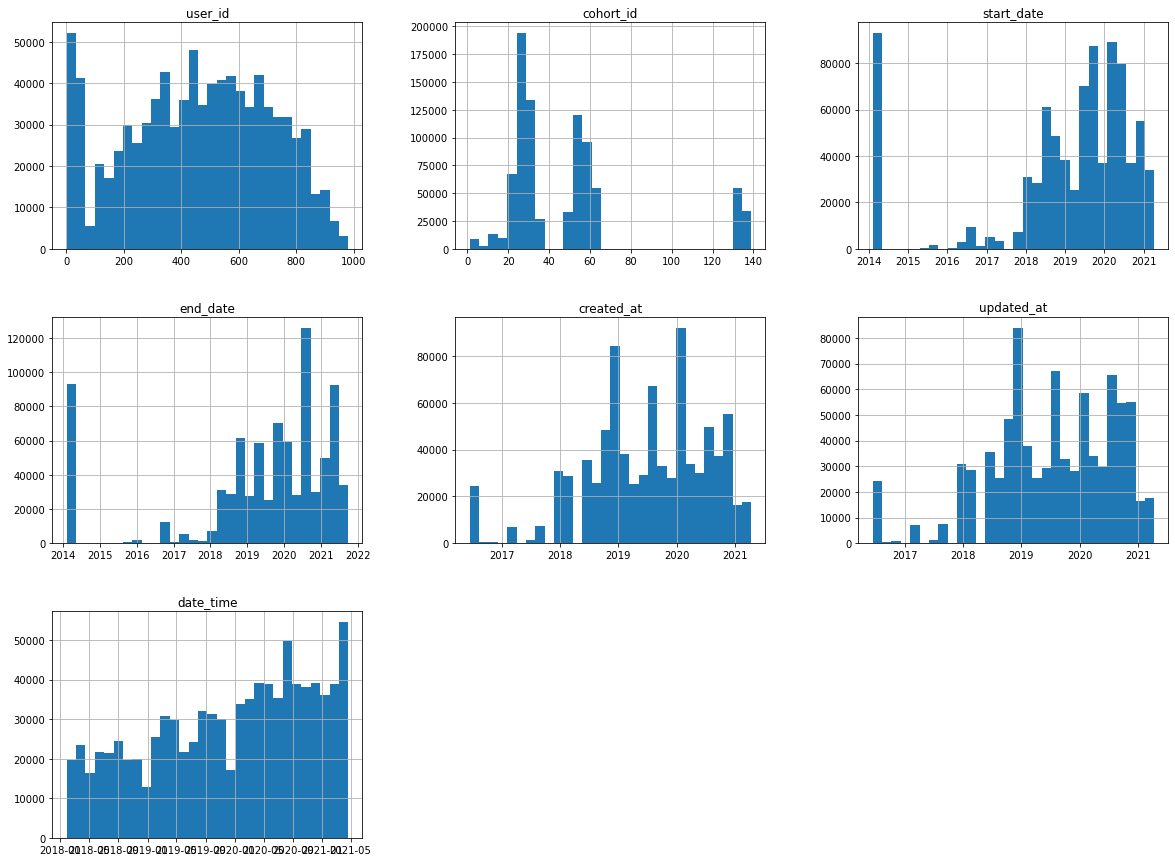

In [6]:
df.hist(bins=30, figsize=(20, 15))

In [7]:
df['path'].nunique()

2313

<AxesSubplot:>

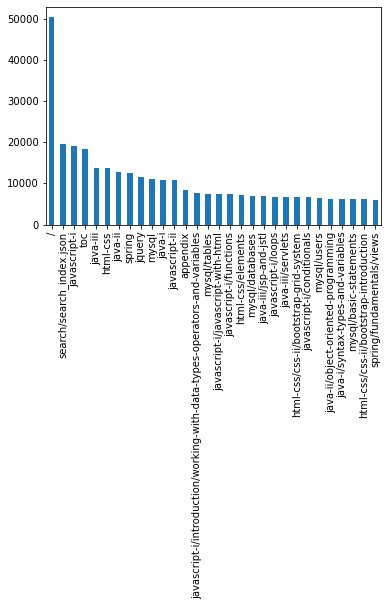

In [8]:
df['path'].value_counts()[:30].plot(kind='bar')

In [9]:
df.ip.nunique()

5531

<AxesSubplot:>

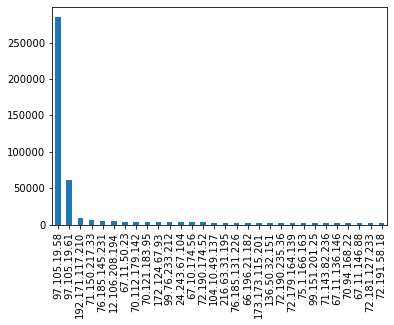

In [10]:
df['ip'].value_counts()[:30].plot(kind='bar')

note - interesting the one ip address and the second highest too. maybe the instructors share one often working from same comp? or could be a scraping thing. keep in mind

In [11]:
df.name.nunique()

47

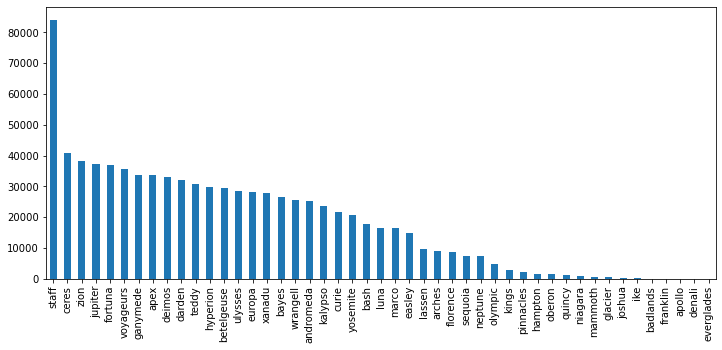

In [12]:
df['name'].value_counts()[:47].plot(kind='bar', figsize=(12,5))
plt.show()

In [13]:
#df['slack'] = df['slack'].str[1:]

In [14]:
#df.slack.value_counts()

In [15]:
#df['slack'] = df.slack.replace({'taff': 'staff'})

In [16]:
#df['slack'].value_counts()

In [17]:
#df['slack'].groupby(df.name).max()

In [18]:
#df.cohort_id.nunique()

In [19]:
#df['slack'].nunique(), df.name.nunique()

this is what's not right 

Bayes              staff

should be fine just using name as it's basically the same, but has bayes and staff

summary so far-
- datatypes for date time
- drop slack
- drop delete column
- drop the null values 
- should be about 850k records
- look at dtypes closely and make changes where desired (maybe name instead of number for a couple)
- maybe change name to cohort, lower case
- cohort id corresponds to name. do you need both? probably ok to keep both incase
- keep the couple very high counts ip addresses in mind
- talk with group about what they found and put in function


### Questions to keep in mind (5 should be answered very thoroughly. Could touch on all, but 5 min- for MVP)

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 75.5+ MB


## Explore: Question 3 

### Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### Initial thoughts about question:
- First, we are looking at only active students for this question. That means I am creating a df that has records where the date (date of access) falls is between (or on) start date and end date
- what could we find out about the students? 
    - difference in access of virtual vs. inperson?
    - what is "low access"- look at numbers here and %s. make some bins of average, low, very low, etc.
    - what cohort they are in? do students in certain cohorts tend to access a lot less? what about program?
    - could very low access be due to students dropping out of the program possibly?
    - do students access more, less, same early on? near graduation?
    - do the low access students have ip addresses local to SA, not local? appear to be remote or not? covid 19 impact on access?
    - else?

In [21]:
df3 = explore.explore_question3(df)

In [22]:
df3.info()
#look at df3 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647197 entries, 4 to 900217
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   path            647197 non-null  object        
 1   user_id         647197 non-null  object        
 2   ip              647197 non-null  object        
 3   cohort          647197 non-null  object        
 4   start_date      647197 non-null  datetime64[ns]
 5   end_date        647197 non-null  datetime64[ns]
 6   created_at      647197 non-null  datetime64[ns]
 7   updated_at      647197 non-null  datetime64[ns]
 8   program         647197 non-null  object        
 9   date_time       647197 non-null  datetime64[ns]
 10  program_access  647197 non-null  bool          
dtypes: bool(1), datetime64[ns](5), object(5)
memory usage: 54.9+ MB


<AxesSubplot:>

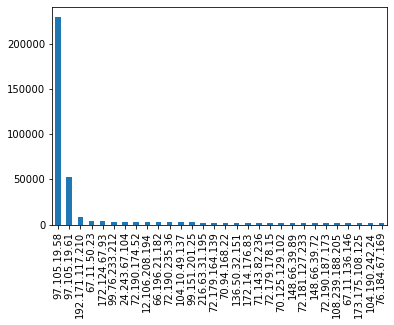

In [23]:
df3['ip'].value_counts()[:30].plot(kind='bar')

interesting that we still have those couple ip addresses that have a cra amount of access even though dropped staff and non-students. quick look to see what this could be about

In [24]:
df3['ip'].value_counts().head()

97.105.19.58       229087
97.105.19.61        52122
192.171.117.210      7984
67.11.50.23          4181
172.124.67.93        3488
Name: ip, dtype: int64

In [25]:
df3[df3['ip'] == '97.105.19.58'].groupby(df3.cohort).sum()

,program_access
cohort,
andromeda,16932
bayes,16899
betelgeuse,20761
ceres,26797
curie,5189
deimos,21483
europa,17470
fortuna,11888
ganymede,13


In [26]:
df3[df3['ip'] == '97.105.19.58'].groupby(df3.user_id).sum()

,program_access
user_id,
118,5
119,3
120,671
124,11
127,25
...,...
625,2
626,1
627,1


so we have 345 user ids that have used this ip address, some much more than others

In [27]:
df3[df3['user_id'] == 120].groupby(df3.ip).sum()
#all of the ip addresses from user 120

,program_access
ip,
104.15.38.22,30
104.190.255.78,69
104.48.213.175,687
192.171.117.210,100
70.123.135.83,18
70.123.137.196,64
72.128.136.219,4
72.177.116.71,3
72.179.136.146,3


OK, I'm thinking that this is the public IP address for codeup so we could potentially infer that these are inperson students. One more thought to see if that makes sense...

Also, this is what google says-

If you access the Internet from a local network (LAN) in your home or business, it is possible that you share an IP address with other users. This is because, while you might use different computers or devices, you all use the same Internet connection

If my theory is true, there'd be no access from that ip during a lot of covid time

In [28]:
df3[df3['ip'] == '97.105.19.58'].groupby(df3.date_time < '2020-03-15').sum()

,program_access
date_time,
False,485
True,228602


In [29]:
df3[df3['ip'] == '97.105.19.58'].groupby(df3.date_time < '2020-03-30').sum()

,program_access
date_time,
True,229087


ok, this ip address definitely stopped being used right at lock down time. let's look at the other

In [30]:
df3[df3['ip'] == '97.105.19.61'].groupby(df3.date_time < '2020-03-30').sum()

,program_access
date_time,
True,52122


In [31]:
df3[df3['ip'] == '192.171.117.210'].groupby(df3.date_time < '2020-03-30').sum()

,program_access
date_time,
False,394
True,7590


ok, right now, I don't have enough info to determine in person vs. virtual so potentially will come back to this idea, but those could ip addresses I can deteermine are at Codeup and went dead when the pandemic started. That's all I'll do w ip addresses right now

### What is "low access"

In [32]:
cohort_counts = df3.cohort.value_counts()
cohort_counts
#check to make sure no staff and lowest access

jupiter       36447
ceres         35766
zion          33842
fortuna       33397
voyageurs     32337
ganymede      29438
darden        28834
apex          28641
hyperion      28513
betelgeuse    25936
europa        25702
teddy         25280
deimos        24799
ulysses       24088
wrangell      24059
kalypso       23691
xanadu        22508
bayes         21813
andromeda     21114
yosemite      19255
curie         17943
luna          16623
marco         16397
bash          16371
easley        14715
florence       8562
neptune        7276
sequoia        2178
oberon         1672
Name: cohort, dtype: int64

notes: gives overview, but to be fair, this doesn't mean much without comparing this to the amount of students in that cohort. looking at that...

In [33]:
user_counts = df3.user_id.groupby(df3.cohort).nunique()
user_counts

cohort
andromeda     27
apex          21
bash          22
bayes         22
betelgeuse    20
ceres         29
curie         19
darden        28
deimos        25
easley        17
europa        28
florence      21
fortuna       28
ganymede      28
hyperion      23
jupiter       33
kalypso       23
luna          20
marco         31
neptune       37
oberon        26
sequoia       21
teddy         31
ulysses       28
voyageurs     33
wrangell      26
xanadu        20
yosemite      27
zion          25
Name: user_id, dtype: int64

In [34]:
round(cohort_counts/user_counts).sort_values()
#this is average active student access per cohort
#of course this does not show individual students yet that have low access, just overview by cohort

oberon          64.0
sequoia        104.0
neptune        197.0
florence       408.0
marco          529.0
yosemite       713.0
bash           744.0
andromeda      782.0
teddy          815.0
luna           831.0
ulysses        860.0
easley         866.0
europa         918.0
wrangell       925.0
curie          944.0
voyageurs      980.0
deimos         992.0
bayes          992.0
kalypso       1030.0
darden        1030.0
ganymede      1051.0
jupiter       1104.0
xanadu        1125.0
fortuna       1193.0
ceres         1233.0
hyperion      1240.0
betelgeuse    1297.0
zion          1354.0
apex          1364.0
dtype: float64

In [35]:
df3.cohort.groupby(df3.program).nunique()

program
data_science        5
full_stack_java    24
Name: cohort, dtype: int64

In [36]:
df3.cohort.groupby(df3.program == 'data_science').unique()

program
False    [teddy, sequoia, ulysses, voyageurs, wrangell,...
True              [bayes, curie, darden, easley, florence]
Name: cohort, dtype: object

In [37]:
def bar_color(df3,color1,color2):
    return np.where(df3.program == 'data_science' ,color1,color2)

<AxesSubplot:>

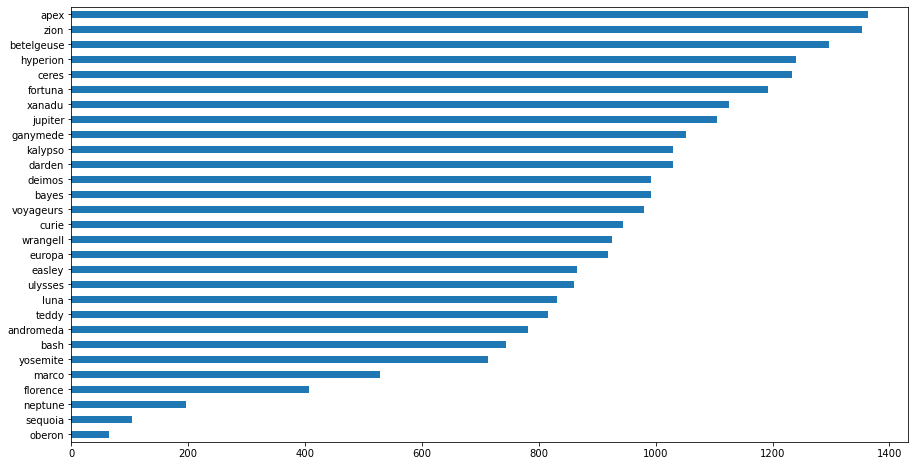

In [38]:
plt.figure(figsize=(15,8))
(df3.cohort.value_counts()/df3.user_id.groupby(df3.cohort).nunique()).sort_values(ascending=True).plot(kind='barh')

In [39]:
df3['cohort_program'] = df3['program'] + '_' + df3['cohort']

<AxesSubplot:>

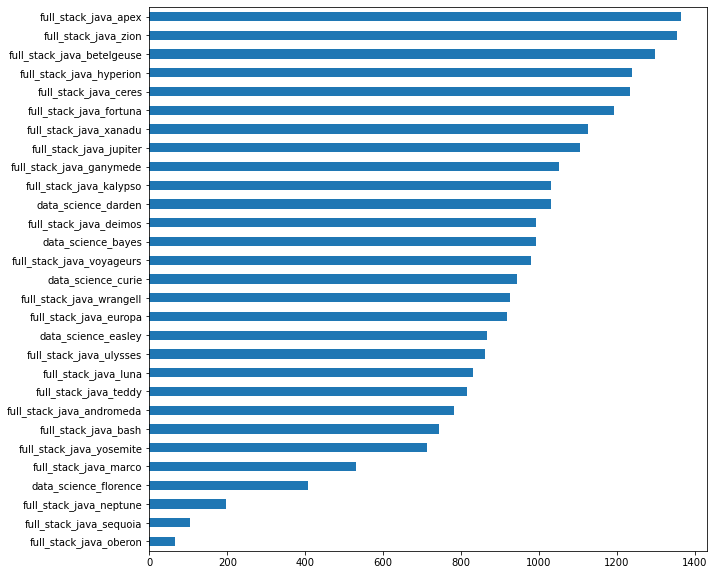

In [40]:
plt.figure(figsize=(10,10))
(df3.cohort_program.value_counts()/df3.user_id.groupby(df3.cohort_program).nunique()).sort_values(ascending=True).plot(kind='barh')

there are only 5 ds cohorts in the set compared to 24 java and ds is spread out here with averages so right now there isnt a super obvious trend with averages, but let's bin low access and see if those students tend to fall in certain programs. We can see here a couple cohorts had super low averages. any trend with them?

### binning-

In [41]:
counts = df3.user_id.value_counts()
#low = active[active['user_id'].isin(counts[counts < 100].index)]

In [42]:
df3.user_id.value_counts()

344    4763
570    4075
685    3223
671    3193
555    3086
       ... 
832       3
879       1
940       1
918       1
619       1
Name: user_id, Length: 731, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   path        900222 non-null  object        
 1   user_id     900223 non-null  int64         
 2   cohort_id   847330 non-null  float64       
 3   ip          900223 non-null  object        
 4   name        847330 non-null  object        
 5   start_date  847330 non-null  datetime64[ns]
 6   end_date    847330 non-null  datetime64[ns]
 7   created_at  847330 non-null  datetime64[ns]
 8   updated_at  847330 non-null  datetime64[ns]
 9   program_id  847330 non-null  object        
 10  date_time   900223 non-null  datetime64[ns]
dtypes: datetime64[ns](5), float64(1), int64(1), object(4)
memory usage: 75.5+ MB


In [44]:
df3.groupby(df.user_id).sum()

,program_access
user_id,
2,1541
3,1514
4,692
5,1621
6,1311
...,...
976,29
977,86
978,55


In [45]:
counts.mean(), counts.min(), counts.max()

(885.358413132695, 1, 4763)

In [46]:
counts.quantile(.01)

6.3

In [47]:
counts.quantile(.05)

50.0

In [48]:
counts.quantile(.10)

115.0

<AxesSubplot:>

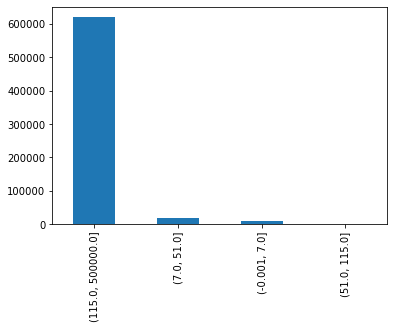

In [63]:
pd.cut(df3['user_id'], [0, 7 , 51 , 115, 500000], include_lowest=True).value_counts().plot(kind='bar')

In [50]:
bins = [0, 7, 51, 115, 50000000]
labels = ['bottom_1', 'bottom_1-5','bottom_5-10', 'not_bottom']
df3['bottom'] = pd.cut(df3['user_id'].value_counts(), bins=bins, labels=labels)

In [62]:
df3[df3.bottom == 'not_bottom']

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,cohort_program,bottom
4,javascript-i/conditionals,2,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:24,True,full_stack_java_teddy,not_bottom
5,javascript-i/loops,2,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:41,True,full_stack_java_teddy,not_bottom
6,javascript-i/conditionals,3,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:46,True,full_stack_java_teddy,not_bottom
7,javascript-i/functions,3,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:48,True,full_stack_java_teddy,not_bottom
8,javascript-i/loops,2,97.105.19.61,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-26 09:56:59,True,full_stack_java_teddy,not_bottom
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,javascript-i/conditionals,6,104.53.201.99,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-28 21:46:51,True,full_stack_java_teddy,not_bottom
948,javascript-i/functions,6,104.53.201.99,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-28 21:46:57,True,full_stack_java_teddy,not_bottom
949,appendix/further-reading/javascript/hoisting.html,6,104.53.201.99,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-28 21:47:00,True,full_stack_java_teddy,not_bottom
950,appendix/further-reading/javascript/hoisting,6,104.53.201.99,teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,full_stack_java,2018-01-28 21:47:06,True,full_stack_java_teddy,not_bottom


In [52]:
df_bottom = df_bottom.dropna()

In [53]:
df_bottom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 608 entries, 4 to 969
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   path            608 non-null    object        
 1   user_id         608 non-null    object        
 2   ip              608 non-null    object        
 3   cohort          608 non-null    object        
 4   start_date      608 non-null    datetime64[ns]
 5   end_date        608 non-null    datetime64[ns]
 6   created_at      608 non-null    datetime64[ns]
 7   updated_at      608 non-null    datetime64[ns]
 8   program         608 non-null    object        
 9   date_time       608 non-null    datetime64[ns]
 10  program_access  608 non-null    bool          
 11  cohort_program  608 non-null    object        
 12  bottom          608 non-null    category      
dtypes: bool(1), category(1), datetime64[ns](5), object(6)
memory usage: 58.4+ KB


In [77]:
counts = df3.user_id.value_counts()
bottom_1 = df3[df3['user_id'].isin(counts[counts < 7].index)]
bottom_5 = df3[df3['user_id'].isin(counts[counts < 51].index)]
bottom_10 = df3[df3['user_id'].isin(counts[counts < 116].index)]

In [69]:
bottom_1.describe()

,path,user_id,ip,cohort,start_date,end_date,created_at,updated_at,program,date_time,program_access,cohort_program,bottom
count,22,22.0,22,22,22,22,22,22,22,22,22,22,0
unique,10,8.0,7,7,7,7,7,7,1,22,1,7,0
top,/,956.0,97.105.19.58,oberon,2021-04-12 00:00:00,2021-10-01 00:00:00,2021-04-12 18:07:21,2021-04-12 18:07:21,full_stack_java,2018-09-27 13:57:44,True,full_stack_java_oberon,NaN
freq,9,6.0,7,6,6,6,6,6,22,1,22,6,NaN
first,NaN,NaN,NaN,NaN,2018-05-29 00:00:00,2018-10-11 00:00:00,2018-05-25 22:25:57,2018-05-25 22:25:57,NaN,2018-09-27 13:57:44,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-04-12 00:00:00,2021-10-01 00:00:00,2021-04-12 18:07:21,2021-04-12 18:07:21,NaN,2021-04-15 15:32:22,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_program', ylabel='count'>

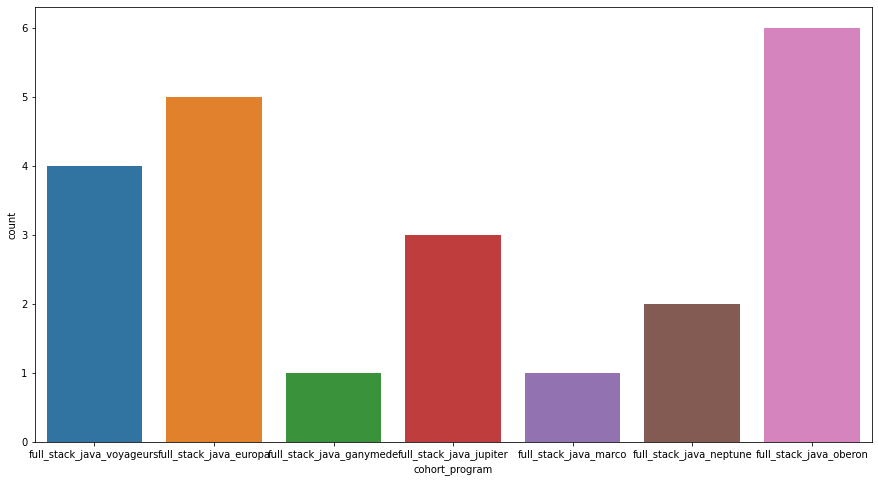

In [84]:
plt.figure(figsize=(15,8))
sns.countplot(bottom_1.cohort_program)

<AxesSubplot:xlabel='cohort_program', ylabel='count'>

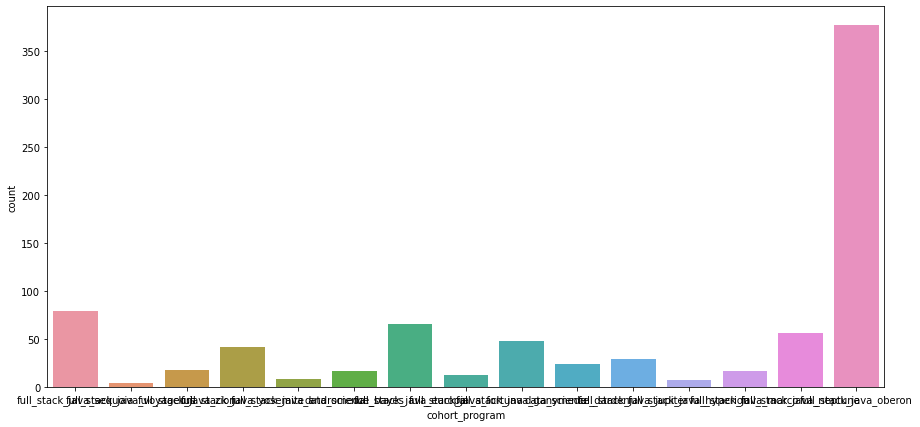

In [89]:
plt.figure(figsize=(15,7))
sns.countplot(bottom_5.cohort_program)

In [92]:
bottom_10.cohort_program.value_counts()

full_stack_java_oberon       1258
full_stack_java_sequoia       759
full_stack_java_voyageurs     388
full_stack_java_neptune       280
full_stack_java_andromeda     217
full_stack_java_bash          185
full_stack_java_teddy         133
full_stack_java_zion          128
full_stack_java_jupiter       117
full_stack_java_ulysses       112
data_science_easley            92
full_stack_java_europa         66
full_stack_java_kalypso        63
full_stack_java_ceres          53
full_stack_java_ganymede       48
full_stack_java_yosemite       42
data_science_darden            24
data_science_bayes             17
full_stack_java_marco          17
full_stack_java_fortuna        12
full_stack_java_hyperion        7
Name: cohort_program, dtype: int64

<AxesSubplot:xlabel='cohort_program', ylabel='count'>

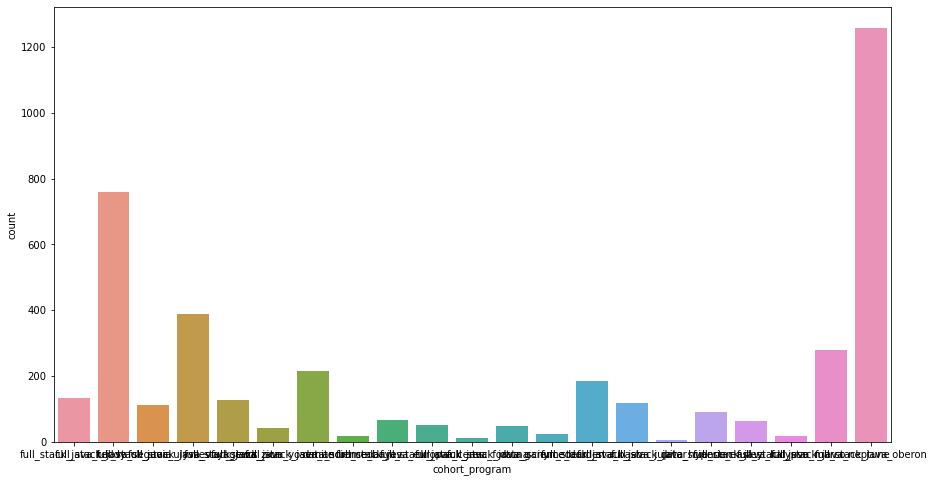

In [90]:
plt.figure(figsize=(15,8))
sns.countplot(bottom_10.cohort_program)

In [95]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647197 entries, 4 to 900217
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   path            647197 non-null  object        
 1   user_id         647197 non-null  object        
 2   ip              647197 non-null  object        
 3   cohort          647197 non-null  object        
 4   start_date      647197 non-null  datetime64[ns]
 5   end_date        647197 non-null  datetime64[ns]
 6   created_at      647197 non-null  datetime64[ns]
 7   updated_at      647197 non-null  datetime64[ns]
 8   program         647197 non-null  object        
 9   date_time       647197 non-null  datetime64[ns]
 10  program_access  647197 non-null  bool          
 11  cohort_program  647197 non-null  object        
 12  bottom          608 non-null     category      
dtypes: bool(1), category(1), datetime64[ns](5), object(6)
memory usage: 76.6+ MB


In [100]:
bottom_1[['start_date', 'end_date', 'date_time']]

,start_date,end_date,date_time
131699,2018-05-29,2018-10-11,2018-09-27 13:57:44
131788,2018-05-29,2018-10-11,2018-09-27 14:47:37
131802,2018-05-29,2018-10-11,2018-09-27 14:58:48
131804,2018-05-29,2018-10-11,2018-09-27 14:59:07
388308,2019-11-04,2020-04-17,2019-11-04 16:19:26
388309,2019-11-04,2020-04-17,2019-11-04 16:19:34
388399,2019-11-04,2020-04-17,2019-11-04 16:54:02
388405,2019-11-04,2020-04-17,2019-11-04 16:54:38
388407,2019-11-04,2020-04-17,2019-11-04 16:54:45
491139,2020-03-23,2020-08-20,2020-03-23 14:10:17


In [103]:
bottom_1['month_start'] = bottom_1.start_date.dt.month
bottom_1['month_access'] = bottom_1.date_time.dt.month

<AxesSubplot:xlabel='month_start', ylabel='month_access'>

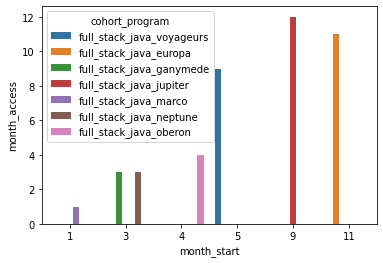

In [117]:
sns.barplot(x='month_start', y='month_access', data=bottom_1, hue='cohort_program')

notes: for bottom 1%, most access seems to be in first month of program for those that started in jan feb march april, nov

<AxesSubplot:xlabel='month_start', ylabel='month_access'>

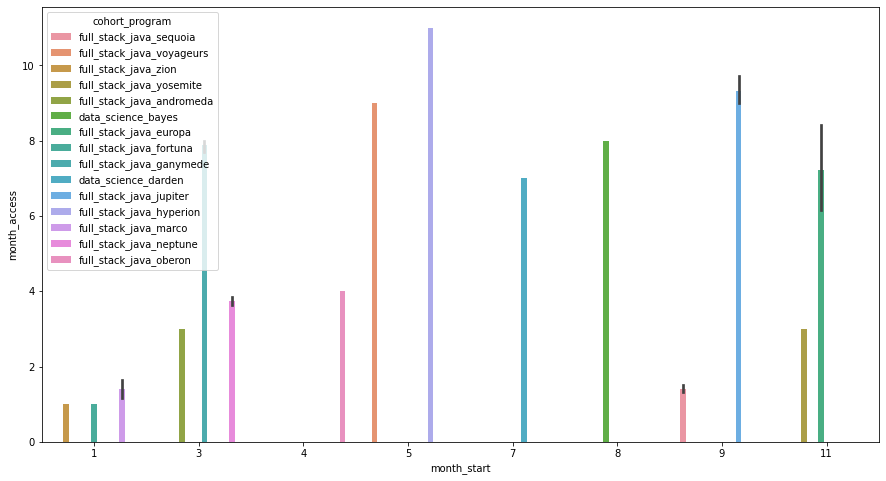

In [118]:
plt.figure(figsize=(15,8))
bottom_5['month_start'] = bottom_5.start_date.dt.month
bottom_5['month_access'] = bottom_5.date_time.dt.month
sns.barplot(x='month_start', y='month_access', data=bottom_5, hue='cohort_program')

<AxesSubplot:xlabel='month_start', ylabel='month_access'>

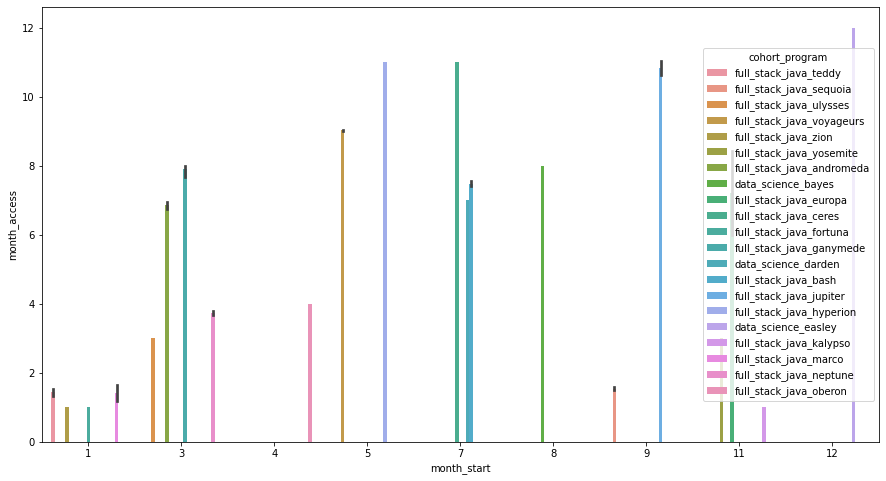

In [119]:
plt.figure(figsize=(15,8))
bottom_10['month_start'] = bottom_10.start_date.dt.month
bottom_10['month_access'] = bottom_10.date_time.dt.month
sns.barplot(x='month_start', y='month_access', data=bottom_10, hue='cohort_program')

summary- 
have identified cohorts with an average lower access
very low access tends to be most present in accessing near the beginning of the course. could be to drop out?

In [125]:
bottom_1[['cohort', 'start_date']].value_counts()

cohort     start_date
oberon     2021-04-12    6
europa     2019-11-04    5
voyageurs  2018-05-29    4
jupiter    2020-09-21    3
neptune    2021-03-15    2
ganymede   2020-03-23    1
marco      2021-01-25    1
dtype: int64

In [126]:
bottom_5[['cohort', 'start_date']].value_counts()

cohort     start_date
oberon     2021-04-12    378
sequoia    2017-09-27     79
europa     2019-11-04     66
neptune    2021-03-15     56
ganymede   2020-03-23     48
yosemite   2018-11-05     42
jupiter    2020-09-21     29
darden     2020-07-13     24
zion       2019-01-22     18
bayes      2019-08-19     17
marco      2021-01-25     17
fortuna    2020-01-13     12
andromeda  2019-03-18      8
hyperion   2020-05-26      7
voyageurs  2018-05-29      4
dtype: int64

oberon clearly had lowest access. anything going on then that could affect access? covid? anything else? does not look like there is anything clear with when then program happened that would impact 

In [128]:
bottom_10[['cohort_program', 'start_date']].value_counts()

cohort_program             start_date
full_stack_java_oberon     2021-04-12    1258
full_stack_java_sequoia    2017-09-27     759
full_stack_java_voyageurs  2018-05-29     388
full_stack_java_neptune    2021-03-15     280
full_stack_java_andromeda  2019-03-18     217
full_stack_java_bash       2020-07-20     185
full_stack_java_teddy      2018-01-08     133
full_stack_java_zion       2019-01-22     128
full_stack_java_jupiter    2020-09-21     117
full_stack_java_ulysses    2018-03-05     112
data_science_easley        2020-12-07      92
full_stack_java_europa     2019-11-04      66
full_stack_java_kalypso    2020-11-02      63
full_stack_java_ceres      2019-07-15      53
full_stack_java_ganymede   2020-03-23      48
full_stack_java_yosemite   2018-11-05      42
data_science_darden        2020-07-13      24
full_stack_java_marco      2021-01-25      17
data_science_bayes         2019-08-19      17
full_stack_java_fortuna    2020-01-13      12
full_stack_java_hyperion   2020-05-26     

- possibly theory! I heard that the VA ran out of funding in june of 2021. when I started the program I was conditional that my funding would be approved by VETTEC. Is there a possible that VETTEC turned away students after starting? anything else to explore that possibility?

- what else can we learn about students- have covered cohorts, programs, month of access for low access... next maybe look into ip address and see if there are any trends there. need to keep in mind that ip address looks questionable based on change with covid, but possibly something there. also, for students with low access, look at their last access date

<AxesSubplot:xlabel='user_id'>

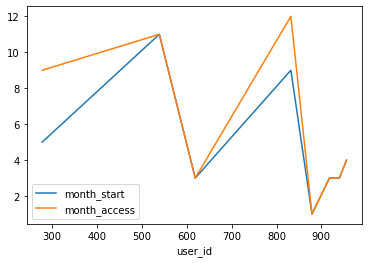

In [139]:
bottom_1[['month_start', 'month_access']].groupby(bottom_1.user_id).max().plot()

<AxesSubplot:xlabel='user_id'>

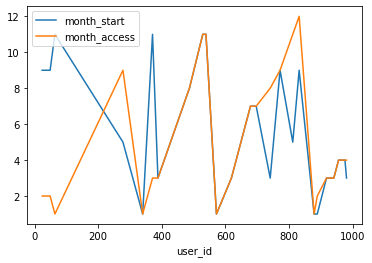

In [140]:
bottom_5[['month_start', 'month_access']].groupby(bottom_5.user_id).max().plot()

<AxesSubplot:xlabel='user_id'>

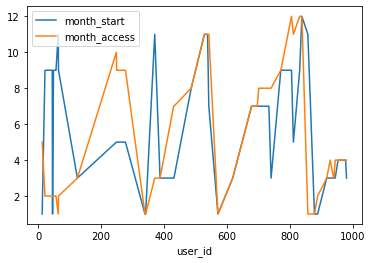

In [144]:
bottom_10[['month_start', 'month_access']].groupby(bottom_10.user_id).max().plot()
#look at it the difference